<a href="https://colab.research.google.com/github/rafaelavarao/Extracao_de_digitos_sudoku/blob/main/SUDOKU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Instalação de Bibliotecas
!pip install opencv-contrib-python
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev
!pip install pytesseract
!pip install matplotlib
!pip install py-sudoku

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,452 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import pytesseract
import matplotlib.pyplot as plt
from sudoku import Sudoku

In [ ]:
# image10.jpg - FUNCIONA
# image47.jpg - FUNCIONA
# image151.jpg - FUNCIONA
# image84.jpg - NÂO
# image93.jpg - NÂO
# img147.jpg - NÂO

In [ ]:
## Acessar arquivos do drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/T1 Visão Computacional/data/')
!ls

Mounted at /content/drive
image10.jpg  image147.jpg  image151.jpg  image47.jpg  image84.jpg  image93.jpg


In [ ]:
path_images = '/content/drive/MyDrive/T1 Visão Computacional/data/'

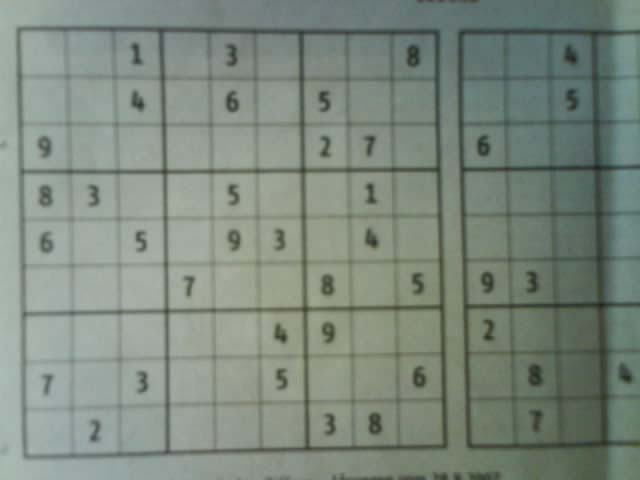

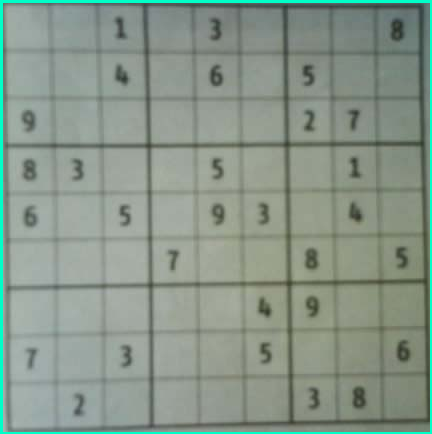

In [ ]:
# Carregando a imagem
img = cv2.imread(path_images + "image93.jpg")
cv2_imshow (img)

# Convertendo para escala de cinza
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicando limiar adaptativo para binarizar a imagem
thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Encontrando contornos na imagem binarizada
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Encontrando o contorno com a maior área
largest_contour = max(contours, key=cv2.contourArea)

# Encontrando o retângulo delimitador do contorno
x, y, w, h = cv2.boundingRect(largest_contour)

# Desenhando o retângulo na imagem original
cv2.rectangle(img, (x, y), (x + w, y + h), (200, 255, 0), 3)

# Recortando a região dentro do retângulo
cropped_img = img[y:y+h, x:x+w]

# Mostrando a imagem recortada
cv2_imshow (cropped_img)

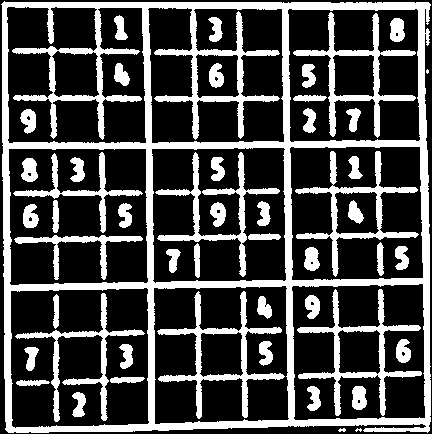

In [ ]:
# Convertendo a imagem recortada para escala de cinza
cropped_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

# Aplicando desfoque gaussiano para redução de ruído
inverted_cropped_img = cv2.GaussianBlur(cropped_gray, (9, 9), 0)

# Aplicando a transformação de threshold adaptativo
inverted_cropped_img = cv2.adaptiveThreshold(inverted_cropped_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Invertendo as cores
inverted_cropped_img = cv2.bitwise_not(inverted_cropped_img)

# Definindo um kernel para dilatação
kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]], np.uint8)

# Dilatando a imagem para redução de ruído
proc = cv2.dilate(inverted_cropped_img, kernel)

cv2_imshow(proc)

94


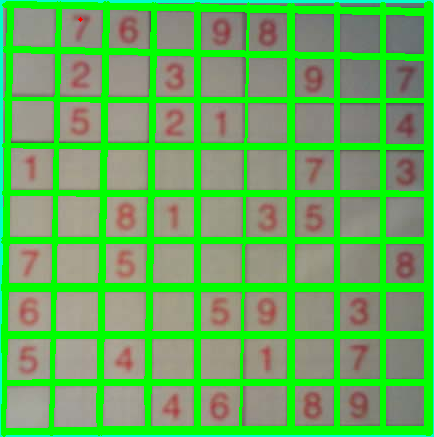

In [ ]:
##TESTANDO como funcionaria detectar linhas e alguns pixels especificos, não é aplicado no codigo!

# Detectar linhas horizontais usando a transformada de Hough
lines = cv2.HoughLinesP(proc, 1, np.pi / 180, threshold=100, minLineLength=300, maxLineGap=10)

# Desenhar as linhas detetadas na imagem original
print(len(lines))
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(cropped_img, (x1, y1), (x2, y2), (0, 255, 0), 2)


cv2.circle(cropped_img, (80,19), 2, (0,0,255), -1)
cv2_imshow(cropped_img)

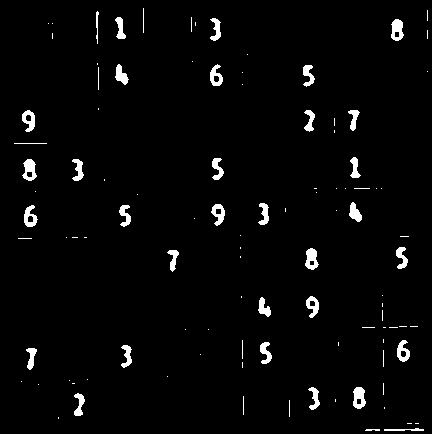

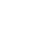

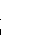

1




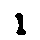

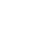

3




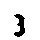

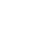

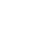

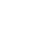

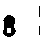

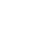

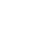

,



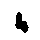

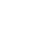

6




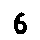

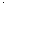

5




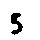

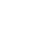

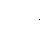

9




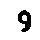

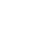

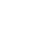

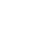

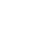

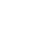

2




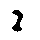

7




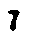

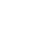

8




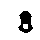

3




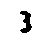

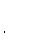

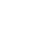

5




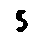

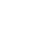

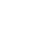

1




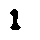

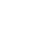

6




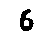

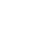

5




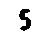

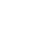

9




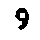

3




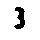

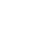

4




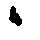

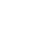

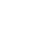

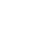

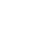

7




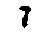

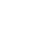

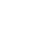

8




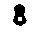

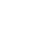

5




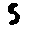

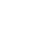

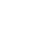

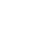

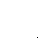

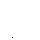

4




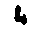

9




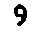

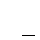

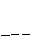

7




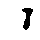

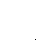

3




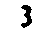

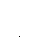

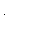

$



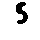

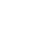

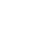

6




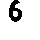

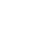

2




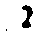

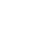

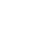

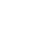

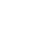

3




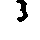

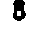

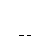

[[0 0 1 0 3 0 0 0 0]
 [0 0 0 0 6 0 5 0 0]
 [9 0 0 0 0 0 2 7 0]
 [8 3 0 0 5 0 0 1 0]
 [6 0 5 0 9 3 0 4 0]
 [0 0 0 7 0 0 8 0 5]
 [0 0 0 0 0 4 9 0 0]
 [7 0 3 0 0 0 0 0 6]
 [0 2 0 0 0 0 3 0 0]]


In [ ]:
# Definindo um kernel para a operação de erosão
kernel = np.ones((3, 3), np.uint8)

# Aplicando a erosão na imagem para reduzir ruído
proc_eroded = cv2.erode(proc, kernel, iterations=1)
proc = proc_eroded

# Detecta linhas horizontais usando a transformada de Hough
lines = cv2.HoughLinesP(proc, 1, np.pi / 1500, threshold=100, minLineLength=0, maxLineGap=10)

# Cria uma cópia da imagem 'proc'
proc_no_lines = proc.copy()

# Remove as linhas horizontais da imagem copiada
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(proc_no_lines, (x1, y1), (x2, y2), (0, 0, 0), 2)  # Pinta a linha com a cor do fundo (preto)

cv2_imshow(proc_no_lines)

# Realiza a segmentação OCR nas células sem as linhas
rows, cols = 9, 9
cell_height = proc_no_lines.shape[0] // rows
cell_width = proc_no_lines.shape[1] // cols
sudoku_cells = []

buffer = 4
for row in range(9):
    for col in range(9):
        x_start = (col * cell_width) + buffer
        x_end = ((col + 1) * cell_width) - buffer #buffer e offset
        y_start = (row * cell_height) + buffer
        y_end = ((row + 1) * cell_height) - buffer

        cell = proc_no_lines[y_start:y_end, x_start:x_end]
        cell_bi = 255 - cell
        # print(np.max(cell))
        sudoku_cells.append(cell_bi)

# Inicializa uma matriz numpy 9x9 com valores vazios
result_matrix = np.zeros((9, 9), dtype=int)

# utilizando o tesserct
for i, cell in enumerate(sudoku_cells):
    custom_config = r'--oem 3 --psm 6 tessedit_char_whitelist=0123456789'
    try:
        extracted_text = pytesseract.image_to_string(cell, config=custom_config)
        # Verifica se a saída é "Ss" e substitui por "5" e outros casos
        if "Ss" in extracted_text:
            extracted_text = extracted_text.replace("Ss", "5")
        if "12" in extracted_text:
            extracted_text = extracted_text.replace("12", "2")
        if "Rg" in extracted_text:
            extracted_text = extracted_text.replace("Rg", "6")
        if "g" in extracted_text:
            extracted_text = extracted_text.replace("g", "8")
        print(extracted_text)

        # Remove caracteres não numéricos do texto extraído
        extracted_text = ''.join(filter(str.isdigit, extracted_text))


        # Calcule as coordenadas (linha e coluna) na matriz
        row = i // 9
        col = i % 9

        # Verifica se o texto extraído não está vazio
        if extracted_text:
            # Converte o texto extraído para um valor inteiro
            value = int(extracted_text)
            print()
        else:
            # Se o texto estiver vazio, 0
            value = 0

        # Preencha a matriz com o valor extraído
        result_matrix[row, col] = value

    except pytesseract.TesseractError as e:
        print("Erro ao processar a imagem:", e)


    cv2_imshow(cell)

print(result_matrix)


In [ ]:
result_list = result_matrix.tolist()
# print(result_list)
puzzle = Sudoku(3, 3, board=result_list)
print(puzzle)


---------------------------
9x9 (3x3) SUDOKU PUZZLE
Difficulty: 0.58
---------------------------
+-------+-------+-------+
|   7 6 |   9 8 |       |
|   2   | 3     | 9   7 |
|   5   | 2 1   |     4 |
+-------+-------+-------+
| 1     |       | 7   3 |
|     8 | 1   3 | 5     |
| 7   5 |       |     8 |
+-------+-------+-------+
| 6     |   5 9 |   3   |
| 5   4 |     1 |   7   |
|       | 4 6   | 8 9   |
+-------+-------+-------+

        


In [ ]:
puzzle.solve().show_full()


---------------------------
9x9 (3x3) SUDOKU PUZZLE
Difficulty: SOLVED
---------------------------
+-------+-------+-------+
| 4 7 6 | 5 9 8 | 3 1 2 |
| 8 2 1 | 3 4 6 | 9 5 7 |
| 9 5 3 | 2 1 7 | 6 8 4 |
+-------+-------+-------+
| 1 4 9 | 6 8 5 | 7 2 3 |
| 2 6 8 | 1 7 3 | 5 4 9 |
| 7 3 5 | 9 2 4 | 1 6 8 |
+-------+-------+-------+
| 6 8 2 | 7 5 9 | 4 3 1 |
| 5 9 4 | 8 3 1 | 2 7 6 |
| 3 1 7 | 4 6 2 | 8 9 5 |
+-------+-------+-------+

        
